# Table of Contents
- [3.0 Introduction to algebraic and transcendental equations](#intro)
 - [History of Numerical Methods](#hist)
     - [A brief pause or reflect](#reflection)
     - [The origins of Numerical Methods](#origins)
- [3.1 Algebraic and Transcendental Equations]()

# 3.0 Introduction to Algebraic and Transcendental Equations <a class="anchor" id="intro"></a>

## 3.0.1 History of Numerical Methods <a class="anchor" id="hist"></a>
### A brief pause to reflect <a class="anchor" id="reflection"></a>

Welcome to the first section where we shall use numerical methods to solve actual physics problems by writing our own algorithms. Hopefully, you are excited at the prospect of solving some interesting problems. Having gone throught the previous sections and with the range of tools in your arsenal including many pre-built modules such as `numpy`, `scipy` and `matplotlib`, you may consider asking, "Why not just use the pre-built modules to solve these problems?". Perhaps you read the documentation for `scipy` and found that it has an integration framework, and the ability to solve differential equations. This is true and in practice, these frameworks are preferred over writing your own algorithms, there's no sense in re-inventing the wheel. 

To counter that, remember that our goal is not just to simply solve problems as a means to an end. It is to show that numerical methods are as important as other branches of physics (such as Quantum Mechanics and Gravitation). In fact, a vast majority of the research performed today, relies on programming of some sort. Practically all theoretical physics uses numerical methods and it's value in experimental research cannot be overstated. Thus we prefer that you understand the inner workings of the problem at hand and to understand the beautiful geometry that underlies all numerical methods. Your greatest tool as a scientist is your mind and your ability to solve a problem with creativity - not the solution itself. Hopefully that's enough justification to continue learning and so we shall proceed...

### The origins of Numerical Methods <a class="anchor" id="origins"></a>
In the past, you may have run into several problems that you we unable to solve, not because you lack the knowledge to understand the concepts, but because there were no algebraic solutions to the problem. This kind of issue arises all over the place in physics, maths and engineering. However, instead of ignorantly exclaiming "not my problem", some pretty nifty mathematicians (Newton, Gauss, Euler... and a few others of your favourites), developed numerical methods to solve problems which did not have closed-form solutions. 

## 3.1 Algebraic and Transcendental Equations
In this section we will introduce *algebraic* and *transcendental* equations. 

## 3.1.0 Roots of equations <a class="anchor" id="roots-eqns"></a>
### 3.1.1 Reminder of roots
Recall that if we have an equation for which, $f(x)=0$, then $x$ is refered to as a **root of the equation**. For a simple example, if we wanted to find the roots of $\sin(x)$ for which $0<x<2\pi$, there is a unique $x$, for which $\sin(x) = 0$, thus we have $x=\pi$ as a root of $\sin(x)$. For a general $f(x)$ which can be an algebraic or transcendental equation of $x$. An **algebraic** equation is one that we can separate out using a finite number of arithmetic operations. For example consider the quadratic equation

$$ax^2 + bx + c = 0$$

Performing some algbraic operations: 

$$x^2 + \frac{b}{a}x + \frac{c}{a} =0$$

$$(x + \frac{b}{2a})^2 - \frac{b^2}{4a^2} + \frac{c}{a} =0$$

$$(x + \frac{b}{2a})^2 - \frac{b^2}{4a^2} + \frac{4ac}{4a^2} =0$$

$$\left(x + \frac{b}{2a}\right)^2 = \frac{b^2 - 4ac}{4a^2}$$

$$x = -\frac{b}{2a} \pm \sqrt{\frac{b^2 - 4ac}{4a^2}}$$


$$x = -\frac{b}{2a} \pm \frac{\sqrt{b^2 - 4ac}}{2a}$$

Which is the famous quadratic formula, which determines the roots of the quadratic equation above. We can see that a finite number of algebraic actions resulted in a closed-form solution for the roots of the equation. It is general. We can perform this same tango for cubic- and quartic-order polynomials. [Check this Mathologer video out](https://www.youtube.com/watch?v=N-KXStupwsc) if you want to learn the history and methods of deriving the cubic equation. However, try as hard as you might, it is impossible to do so for ($n\geq5$)-order polonomials. But what if we want the roots of such an equation? How do we find an analogous formula for this,

$$x - 2\tanh(x) = 0,$$

Let's try, 

$$x = 2\tanh(x),$$
$$\frac{x}{2} = \tanh(x),$$
$$x = \tanh^{-1}\left(\frac{x}{2}\right).$$

Case closed right? Not so fast, we haven't piled all the $x$'s together. You may have the urge to substitute $x$ into itself,

$$x = \tanh^{-1}\left(\frac{1}{2}\tan^{-1}\left(\frac{x}{2}\right)\right)$$
We have to substitute the equation into itself an infinite number of times, since each substitution will introduce another $x$ into the equation. What does all of this substitution so for us?

This is a transcendental equation. Recall that earlier, we had said that an algebraic equation is one that can be solved within a finite number of algebraic operations. For a transcendental equation, this is not the case. This substitution exercise is very reminiscent of recursion, which makes it susceptible to numerical methods. However, do not fear. The most enjoyable part of using numerical methods is actually writing code, which we will soon enough.

### 3.1.2 Methods to solve transcendental equations
Now we will focus on solving some transcendental equations using numerical methods. Note, we will focus on **real** solutions to keep things simple. Using all the methods we will solve the equation 

$$f(x)\equiv 3x^5-x -4=0$$

for comparisons between each method.
### Method 1: Rearrangement Formulas
Suppose that we have an equation $f(x)=0$, if it is possible for us to rearrange the equation of the form

$$x = \varrho(x)$$

such that the funtion $\varrho(x)$ is *slowly-varying* function of $x$, then we can set up the following iteration scheme,

$$x_{n+1} = \varrho(x_n) $$

This stipulation of slowly-varying is an interesting one. If we assume that the true root of the equation is $\xi$, then $f(\xi)=0$ and $\xi = \varrho(\xi)$; then if out initial estimate of the root $x_n$ is close to $\xi$, then the next iteration, $x_{n+1}$ will differ little from ${x_n}$. For the case of the equation that we are going to consider,: 

$$\varrho(x) = \left[\frac{1}{3}(x+4)\right]^{\frac{1}{5}},$$

Thus we can deduce that a decent iteration scheme to solve this equation will be

$$x_{n+1} = \left[\frac{1}{3}(x_n+4)\right]^{\frac{1}{5}}.$$

Let's proceed to write some code which can solve this equation.

In [54]:
# Rearrangement
# 1. Define a function which is equal to the rearranged function of x, we called it ϱ(x)
def rho(x):
    return ((x+4)/3)**(1/5)

# 2. Pick an 'appropriate' initial condition
x_n = 0

# 3. Pick a method of looping (for or while) to calculate recursion of the solution
for i in range(10):
    # Use an f- or .format string to print the values
    print(
        f'(x_n) = {x_n} => f(x_n) = {rho(x_n)}'
    )
    x_n = rho(x_n)

(x_n) = 0 => f(x_n) = 1.0592238410488122
(x_n) = 1.0592238410488122 => f(x_n) = 1.1101777729968871
(x_n) = 1.1101777729968871 => f(x_n) = 1.1124050474797729
(x_n) = 1.1124050474797729 => f(x_n) = 1.112501999079068
(x_n) = 1.112501999079068 => f(x_n) = 1.112506218542466
(x_n) = 1.112506218542466 => f(x_n) = 1.1125064021777085
(x_n) = 1.1125064021777085 => f(x_n) = 1.112506410169694
(x_n) = 1.112506410169694 => f(x_n) = 1.112506410517513
(x_n) = 1.112506410517513 => f(x_n) = 1.1125064105326505
(x_n) = 1.1125064105326505 => f(x_n) = 1.1125064105333093


Pretty good... After 10 iterations we have hit a pretty accurate value for the root of the equation. 

Text(0.5, 1.0, 'Plot of $f(x) = 3x^5 - x - 4$ and the root $x \\approx 1.112506 $')

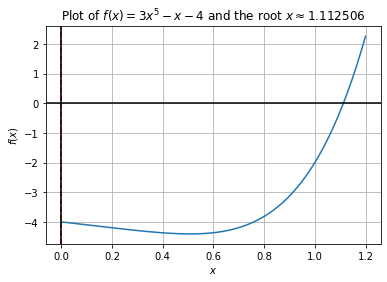

In [53]:
import matplotlib.pyplot as plt
from numpy import linspace
def func(x): 
    return 3*x**5 - x - 4
x = linspace(0, 1.2, 200)

plt.plot(x, func(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.axvline(
    x=x_n, 
    color = 'red', 
    linestyle = "--", 
    label = f'x = {x_n}'
)
plt.axvline(
    x=0, 
    color = 'black', 
    linestyle = "-", 
    label = f'x = {x_n}'
)
plt.axhline(
    y=0,
    color ="black"
)
plt.grid()
plt.title("Plot of $f(x) = 3x^5 - x - 4$ and the root $x \\approx 1.112506 $")
# plt.text(0.65, 5, '$x={x:1.5f}$'.format(x=x_n), fontsize=15)

So hopefully, the more visually-inclined among you also see that after 10 iterations of this scheme, we do indeen fall close to the root of the equation.

### Method 2: Binary Chop (Interval Bisection)
Another commonly used method in the pursuit of solving transcendental equations is interval bisection. This method relies on searching for a change in sign in the list of values of $f(x)$. Suppose an interval $a<x<b$ such that $f(a)<0$ and $f(b)>0$, then for a function that is continuous and monotonically-increasing in this interval there must be a point $c$ ($a<c<b$) such that $f(c)=0$. 